In [24]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Importing Dataset
df=pd.read_csv(r"C:\Users\abhin\Desktop\Projects\Data_Science_CustomasizePvtLtd\hyderabad-salaried-employees.csv")

Removing all the rows which are having 

In [26]:
# Dropping all the Nan values because those columns i guess of no use for bcz no designation,salary,qualification for the Data Preprocessing.
# Removing the below columns because for clustering they are of no use.
df=df.dropna()
df.drop(["candidateName","emailAddress","locationCurrentMas","tel_Other","Category"],axis=1,inplace=True)


In [27]:
# Cleaning Salary Columns and Converting them to float so now salary will be in LPA
df['salary'] = df['salary'].str.replace('Rs. ','').str.replace('lacs','').astype('float')
# Cleaning experienceMas and removing regex part from it
df['experienceMas']=df["experienceMas"].str.replace(r'\D+',".", regex=True).str.slice(0,-1)
# converting experience to months so from now the Experience column will be in Months
df.loc[:,"experienceMas"]=df.loc[:,"experienceMas"].str.split(".")
for i in df.index:
    if len(df["experienceMas"][i])==2:
        df["experienceMas"][i]=int(df["experienceMas"][i][0])*12+int(df["experienceMas"][i][1])
    elif df["experienceMas"][i]==['']:
        df["experienceMas"][i]=0
    else:
        df["experienceMas"][i]=int(df["experienceMas"][i][0])*12

<ipython-input-27-e8b04a2906e6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['salary'] = df['salary'].str.replace('Rs. ','').str.replace('lacs','').astype('float')
<ipython-input-27-e8b04a2906e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["experienceMas"][i]=int(df["experienceMas"][i][0])*12+int(df["experienceMas"][i][1])
<ipython-input-27-e8b04a2906e6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["experienceMas"][i]=int(df["experienceMas"][i][0])*12
<ipython-input-27-e8b04a2906e6>:11: SettingWithCopyWarning: 
A value is trying to be set on a cop

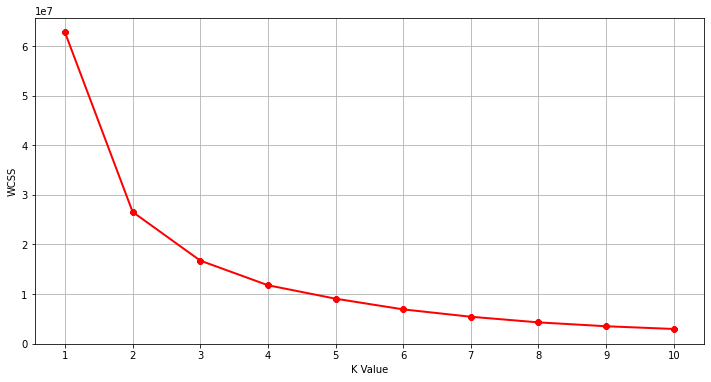

In [28]:
# Checking Cluster by using K-means Clustering Technique
# Creating and Checking Cluster for Experience and Salary
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,[2,-1]])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

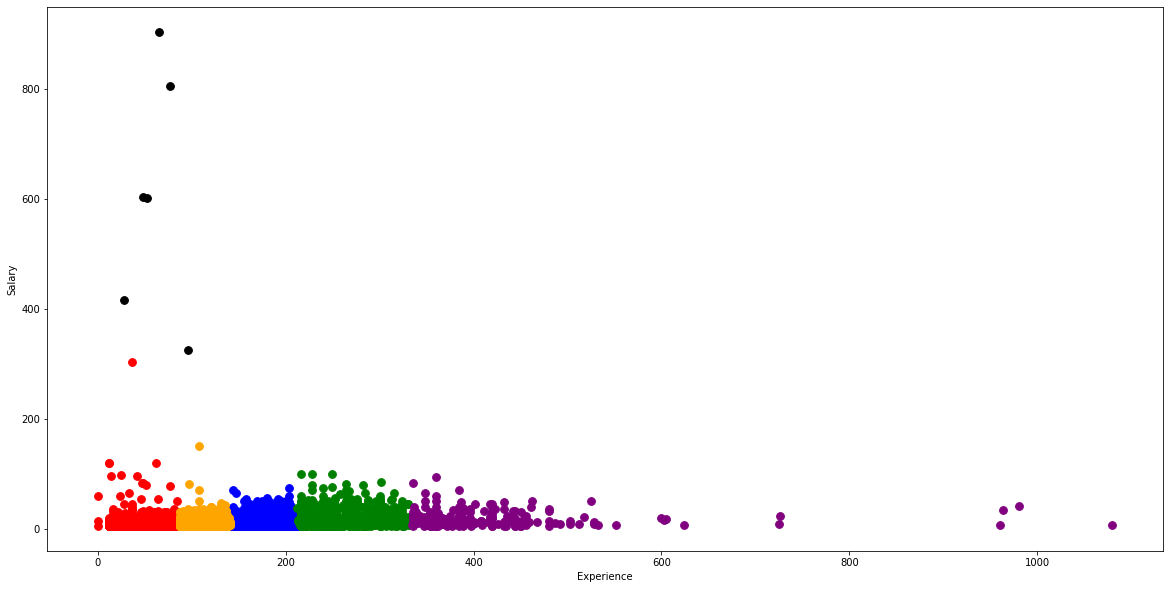

In [29]:
# Taking Cluster as 6 
km = KMeans(n_clusters=6,init="k-means++",random_state=42)
clusters = km.fit_predict(df.iloc[:,[2,-1]])
df["Salary_Experience"] = clusters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize=(20,10))
plt.scatter(df.experienceMas[df.Salary_Experience == 0], df["salary"][df.Salary_Experience == 0], c='blue', s=60)
plt.scatter(df.experienceMas[df.Salary_Experience == 1], df["salary"][df.Salary_Experience == 1], c='red', s=60)
plt.scatter(df.experienceMas[df.Salary_Experience == 2], df["salary"][df.Salary_Experience == 2], c='green', s=60)
plt.scatter(df.experienceMas[df.Salary_Experience == 3], df["salary"][df.Salary_Experience == 3], c='orange', s=60)
plt.scatter(df.experienceMas[df.Salary_Experience == 4], df["salary"][df.Salary_Experience == 4], c='purple', s=60)
plt.scatter(df.experienceMas[df.Salary_Experience == 5], df["salary"][df.Salary_Experience == 5], c='black', s=60)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

After Seeing the Cluster we can easily Classify that it has be clustered as the Black cluster shows that those who are very experienced they are placed less.So we can also increase the clustering number so that it will be accurately classified

In [30]:
# Now i am trying to make clusters on the basis of Company Name and Salary so as company name is 
# a string so Label Encoding them to number also wanted to use one hot encoder but it will create more column
# and that will be difficult for clustering
X=df.iloc[:,[0,5]].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X

array([[122, 5.0],
       [976, 8.05],
       [710, 8.33],
       ...,
       [6063, 7.1],
       [2408, 8.0],
       [4490, 5.05]], dtype=object)

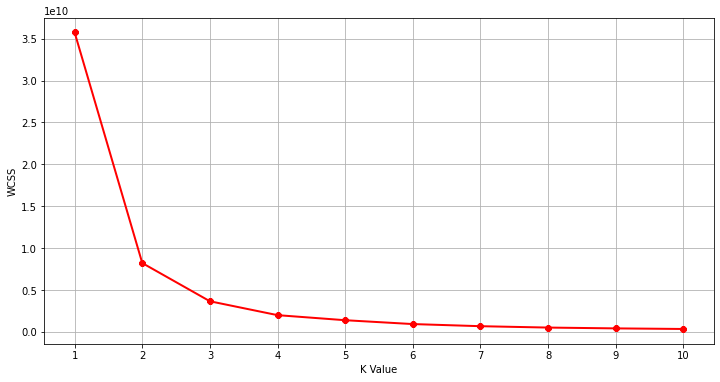

In [31]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

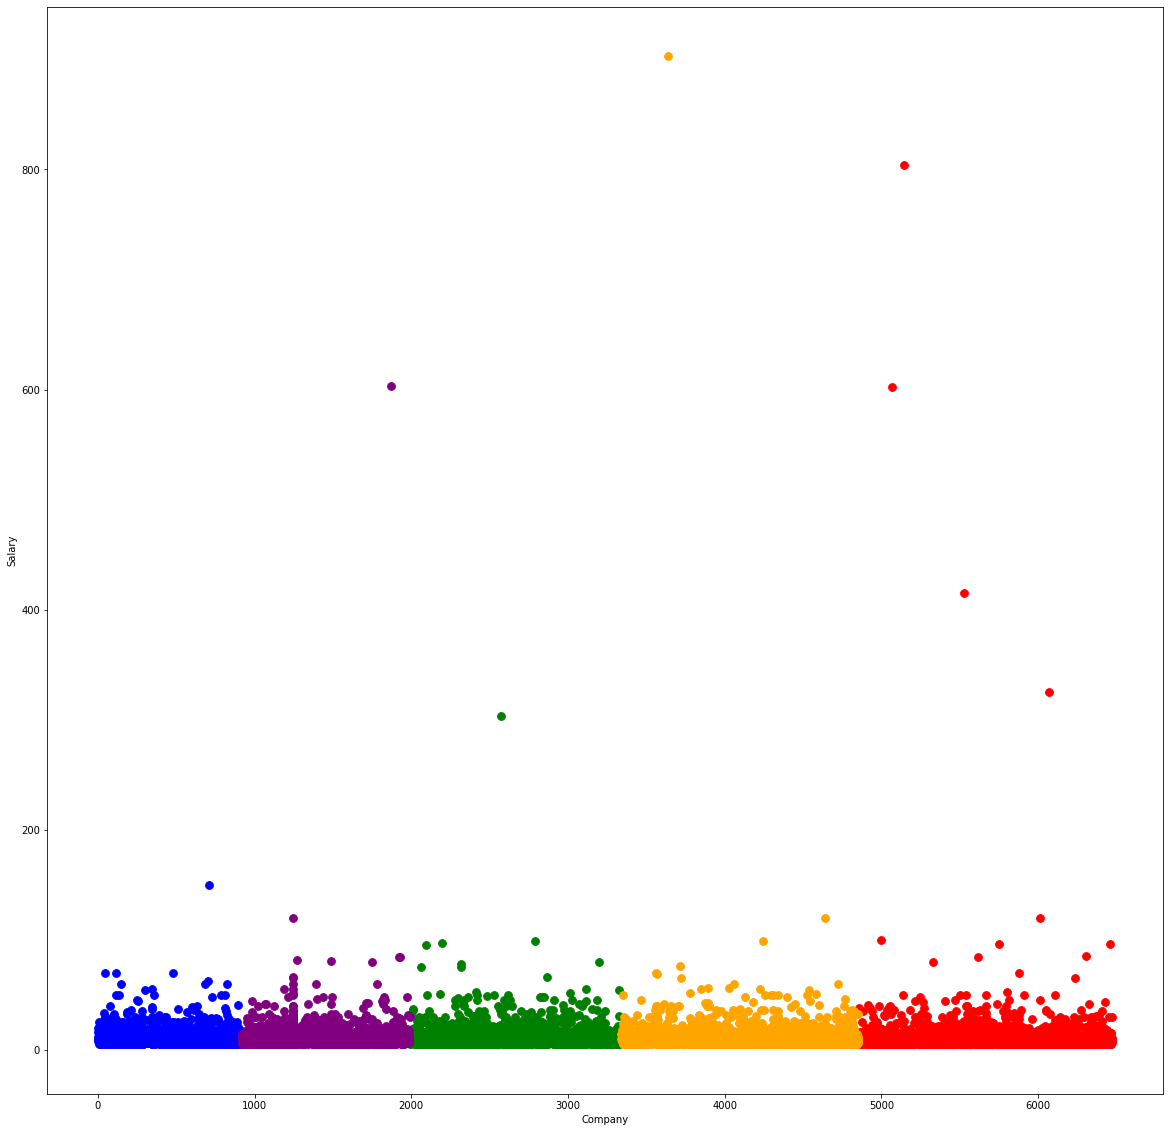

In [32]:
km = KMeans(n_clusters=5,init="k-means++",random_state=42)
X=pd.DataFrame(X,columns=["companyName","salary"])
clusters = km.fit_predict(X)
X["Company_Salary"]=clusters
df["Company_Salary"] = clusters
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig1 = plt.figure(figsize=(20,20))
plt.scatter(X.companyName[X.Company_Salary == 0], X["salary"][X.Company_Salary == 0], c='blue', s=60)
plt.scatter(X.companyName[X.Company_Salary == 1], X["salary"][X.Company_Salary == 1], c='red', s=60)
plt.scatter(X.companyName[X.Company_Salary == 2], X["salary"][X.Company_Salary == 2], c='green', s=60)
plt.scatter(X.companyName[X.Company_Salary == 3], X["salary"][X.Company_Salary == 3], c='orange', s=60)
plt.scatter(X.companyName[X.Company_Salary == 4], X["salary"][X.Company_Salary == 4], c='purple', s=60)
plt.xlabel("Company")
plt.ylabel("Salary")
plt.show()

In [33]:
# Clustering on the basis of designation and Salary
X=df.iloc[:,[1,5]].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X=pd.DataFrame(X,columns=["designation","salary"])
X

,designation,salary
0,3869,5.0
1,740,8.05
2,554,8.33
3,6049,5.0
4,3494,16.03
...,...,...
10242,4036,9.2
10243,2705,20.0
10244,4873,7.1
10245,4680,8.0


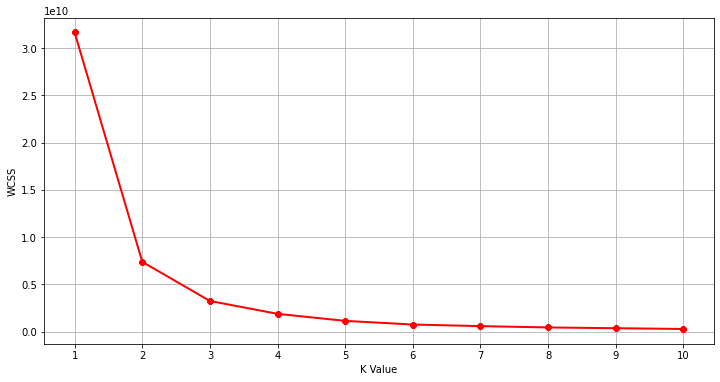

In [34]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

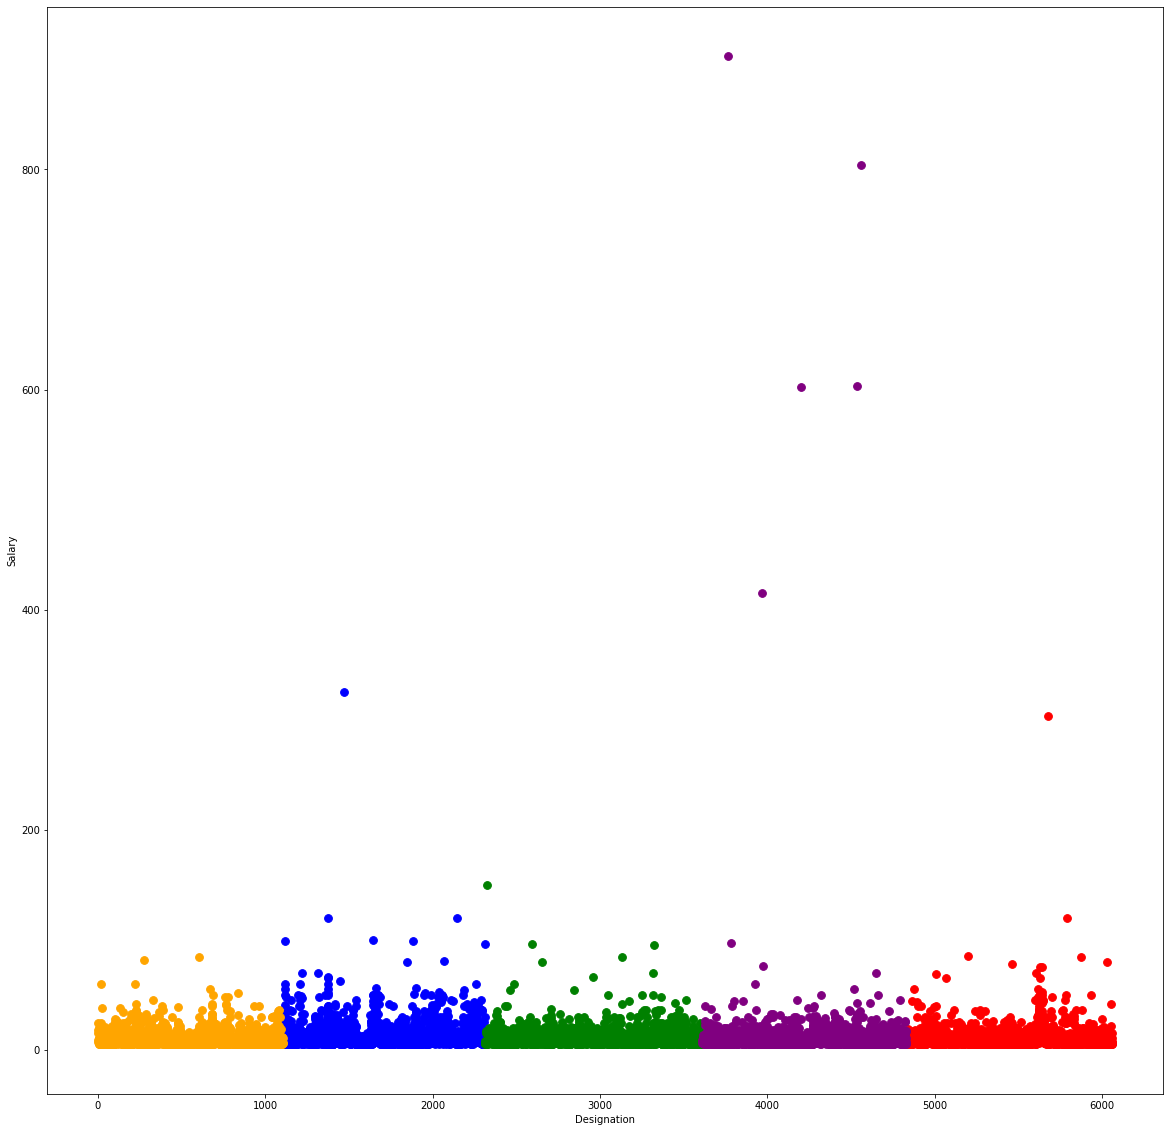

In [35]:
km = KMeans(n_clusters=5,init="k-means++",random_state=42)
clusters = km.fit_predict(X)
X["Designation_Salary"]=clusters
df["Designation_Salary"] = clusters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
fig1 = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111, projection='2d')
plt.scatter(X.designation[X.Designation_Salary == 0], X["salary"][X.Designation_Salary == 0], c='blue', s=60)

plt.scatter(X.designation[X.Designation_Salary == 1], X["salary"][X.Designation_Salary == 1], c='red', s=60)
plt.scatter(X.designation[X.Designation_Salary == 2], X["salary"][X.Designation_Salary == 2], c='green', s=60)
plt.scatter(X.designation[X.Designation_Salary == 3], X["salary"][X.Designation_Salary == 3], c='orange', s=60)
plt.scatter(X.designation[X.Designation_Salary == 4], X["salary"][X.Designation_Salary == 4], c='purple', s=60)

# plt.view_init(30, 185)
plt.xlabel("Designation")
plt.ylabel("Salary")
# ax.set_zlabel('Spending Score (1-100)')
plt.show()

So according to the above clusters we have labelled the company name and desgination and we have designed the clusters accordingly